# 6.5 Unsupervised Machine Learning: Clustering

## Table of Contents

1. Notebook Prep
    Import libraries
    Display graphs inline
    Define 'path' variable
    Import dataframe
    
2. Reprocess Data
    Remove Categorical Variables
    Remove Non-Standardized Variables (Standardization Done Previously)
    
3. Elbow Technique
    Define Range of Potential Clusters
    Define the Clusters
    Display the Rate of Variation
    Plot the Elbow

4. Chosen Number of Clusters

5. Run k-means Algorithm
    Create the k-means object
    Fit the object to the dataframe
    Create Column in the Dataframe
    
6. Visualize the Clusters

7. Discuss Clusters

8. Calculate Descriptive Statistics
    Assign Clusters in Dataframe
    Check Statistics
    
9. Proposal of Future Use

### 1. Notebook Prep

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Display graphs inline

%matplotlib inline

In [3]:
# Define 'path' variable

path = r'D:\Achievement 6'

In [4]:
# Import dataframe

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'births_finances_combined.csv'))

### 2. Reprocess Data

In [5]:
# Remove Categorical Variables

df_proc = df.drop(columns = ['state','year','education_level','ref_year'])

In [6]:
# Remove Non-Standardized Variables (Standardization Done Previously)

df_proc = df_proc.drop(columns = ['total_revenue', 'federal_revenue', 'state_revenue', 'local_revenue', 'total_expenditure', 'instruction_expenditure', 'support_services_expenditure', 'other_expenditure', 'capital_outlay_expenditure', 'total_expenditure_per_student', 'instruction_expenditure_per_student', 'support_expenditure_per_student'])

### 3. Elbow Technique

In [7]:
# Define Range of Potential Clusters

num_cl = range(1,10)

In [8]:
# Define the Clusters

kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [9]:
# Display the Rate of Variation

score = [kmeans[i].fit(df_proc).score(df_proc) for i in range (len(kmeans))]

score

[-3239859241397399.5,
 -1104562671551083.2,
 -436088034915710.25,
 -248171648512268.8,
 -157782657441703.38,
 -84327875059762.25,
 -49002786596053.31,
 -31371842662484.992,
 -24565365769686.54]

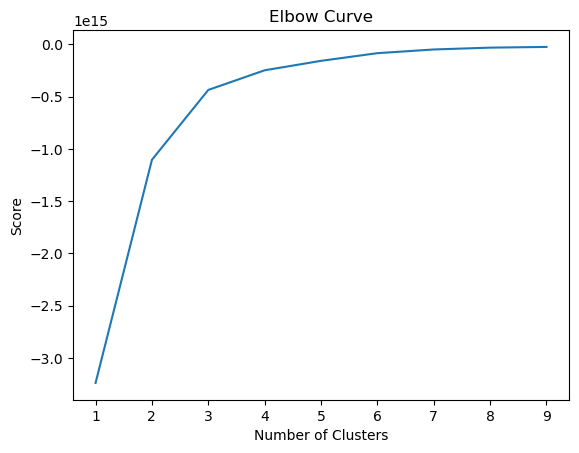

In [10]:
# Plot the Elbow

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. Chosen Number of Clusters

We will assign 3 clusters to the data. There is a sharp curve after 3 that soon flattens out. There almost seems to be a 4th eligible cluster, but as it's less well-defined, we will use 3.

### 5. Run k-means Algorithm

In [11]:
# Create the k-means object

kmeans = KMeans(n_clusters = 3)

In [12]:
# Fit the object to the dataframe

kmeans.fit(df_proc)

KMeans(n_clusters=3)

In [13]:
# Create Column in the Dataframe

df_proc['clusters'] = kmeans.fit_predict(df_proc)

In [14]:
df_proc.head()

,Unnamed: 0,education_code,number_of_births,avg_mother_age,avg_birth_weight_grams,enrolled,7yr_avg_total_per_student,7yr_avg_instruction_per_student,7yr_avg_support_per_student,clusters
0,0,-9,121,27,3095.80,727900.0,7.518008,3.907978,2.136339,0
1,1,1,2240,28,3174.90,728532.0,6.810115,3.563961,1.870747,0
2,2,2,7093,24,3080.60,743273.0,9.337717,4.740090,2.793218,0
3,3,3,18061,25,3138.95,743273.0,9.337717,4.740090,2.793218,0
4,4,4,12969,27,3187.00,729342.0,8.433971,4.349030,2.482999,0


In [15]:
df_proc['clusters'].value_counts()

0    2116
2     526
1     108
Name: clusters, dtype: int64

In [16]:
df_proc.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Clustered_Data.csv'))

### 6. Visualize the Clusters

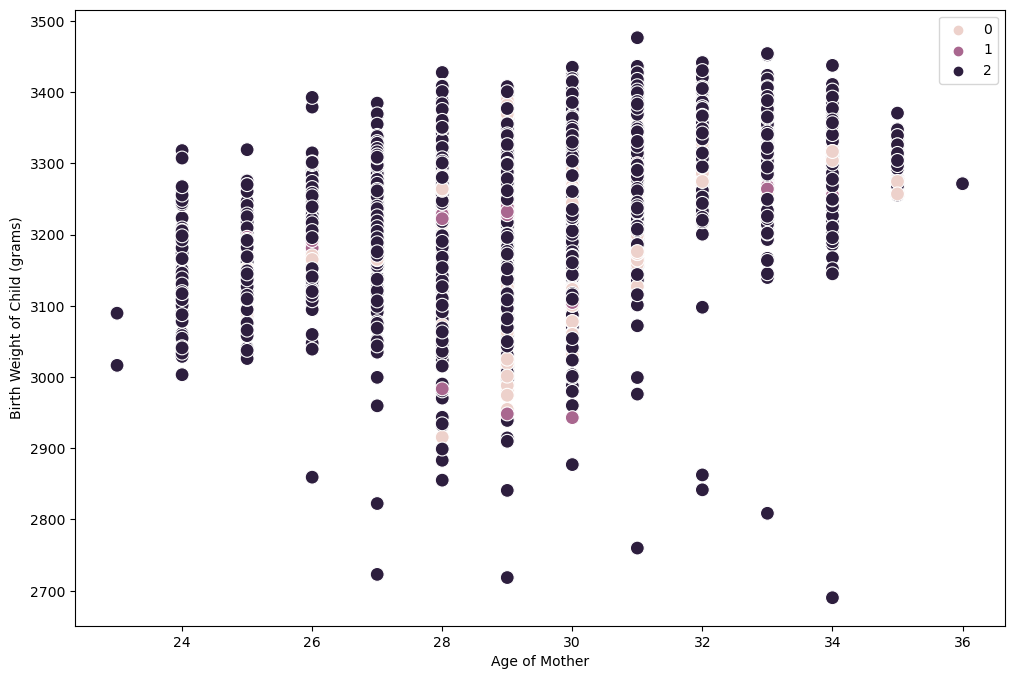

In [16]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_proc['avg_mother_age'], y = df_proc['avg_birth_weight_grams'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Age of Mother')
plt.ylabel('Birth Weight of Child (grams)')
plt.show()

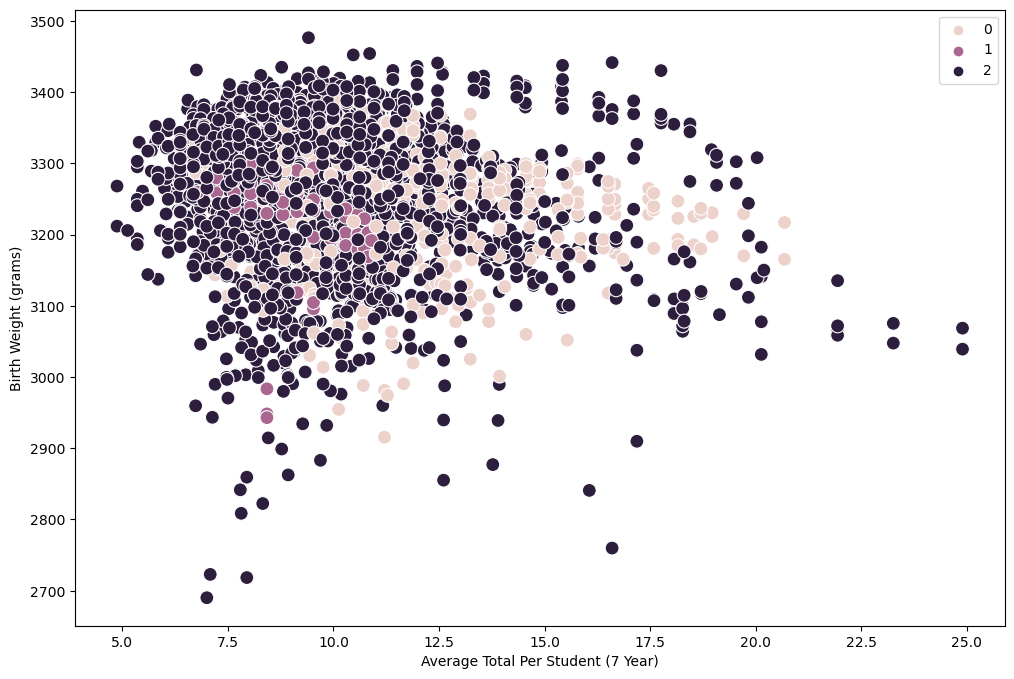

In [18]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_proc['7yr_avg_total_per_student'], y = df_proc['avg_birth_weight_grams'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Total Per Student (7 Year)')
plt.ylabel('Birth Weight (grams)')
plt.show()

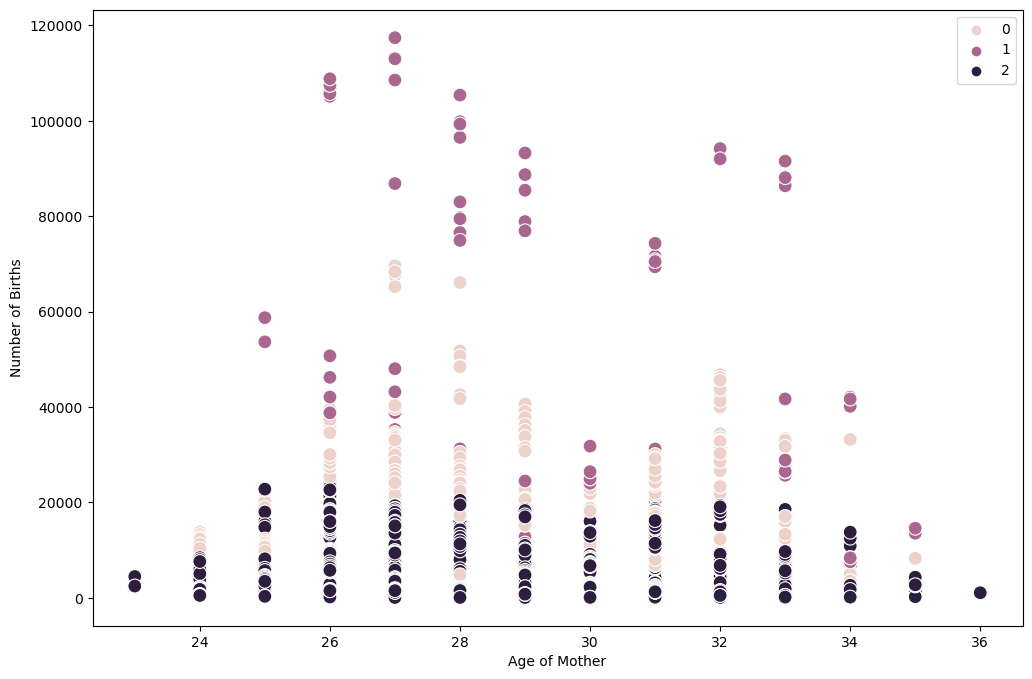

In [19]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_proc['avg_mother_age'], y = df_proc['number_of_births'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Age of Mother')
plt.ylabel('Number of Births')
plt.show()

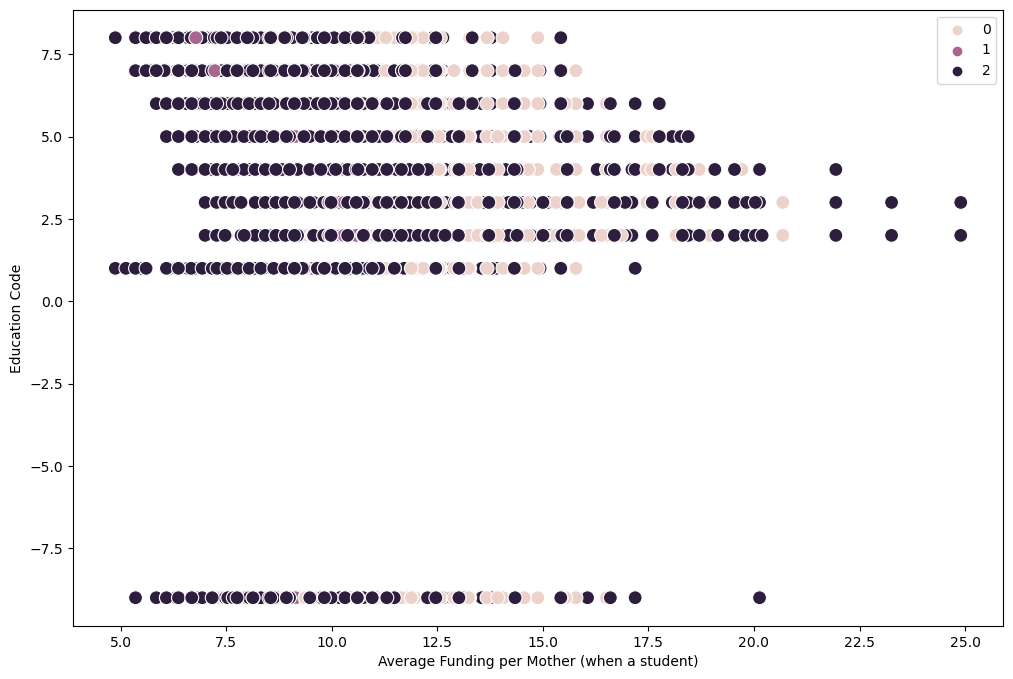

In [20]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_proc['7yr_avg_total_per_student'], y = df_proc['education_code'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Funding per Mother (when a student)')
plt.ylabel('Education Code')
plt.show()

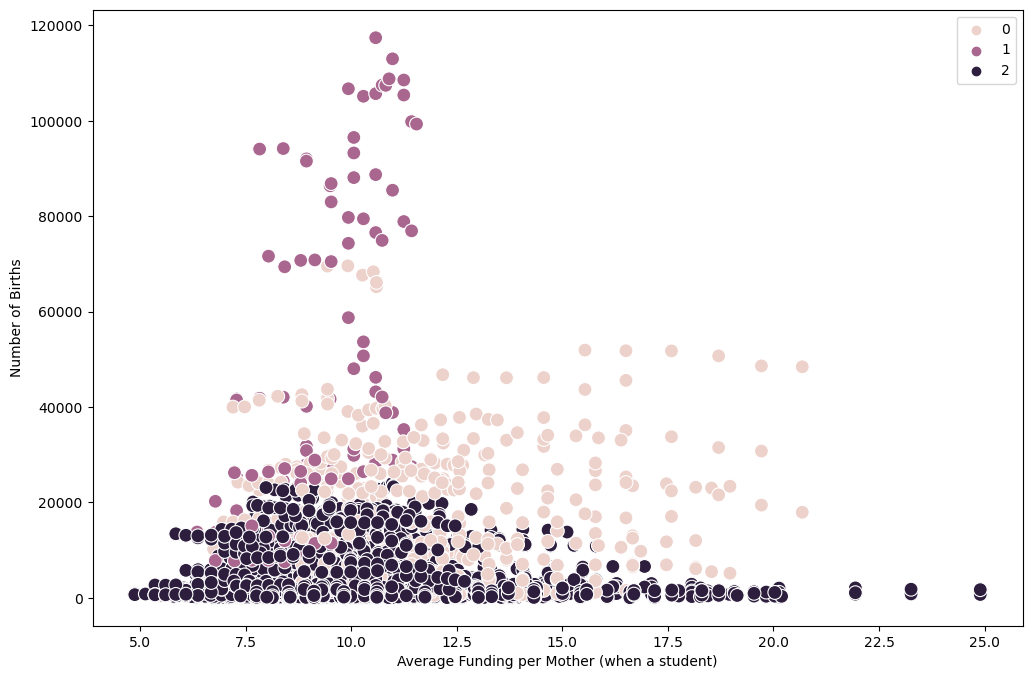

In [21]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_proc['7yr_avg_total_per_student'], y = df_proc['number_of_births'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Funding per Mother (when a student)')
plt.ylabel('Number of Births')
plt.show()

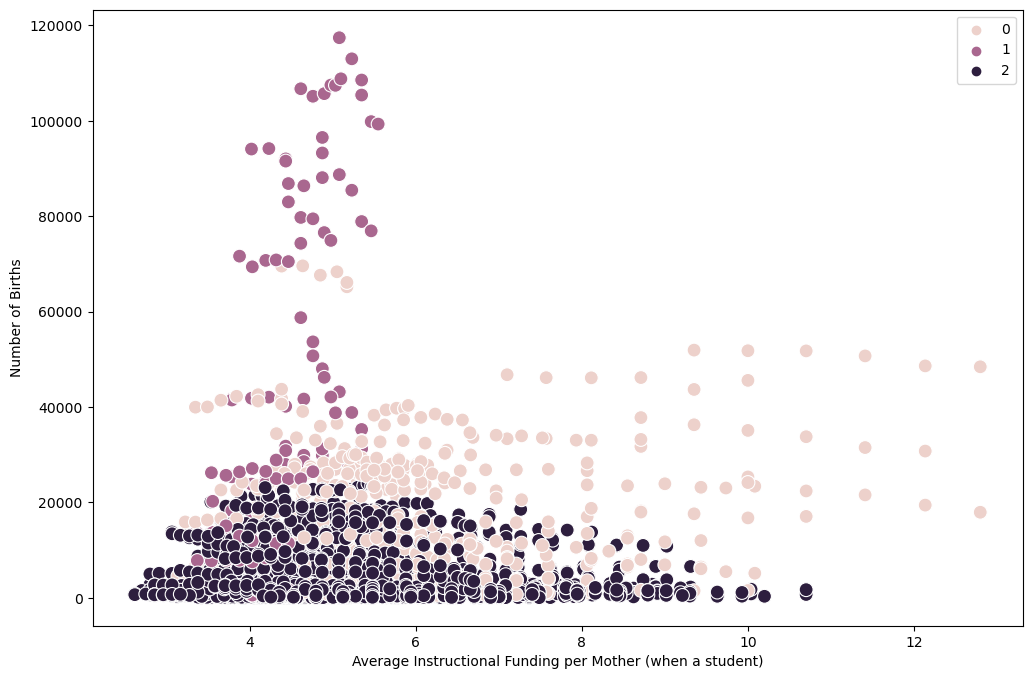

In [23]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_proc['7yr_avg_instruction_per_student'], y = df_proc['number_of_births'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Instructional Funding per Mother (when a student)')
plt.ylabel('Number of Births')
plt.show()

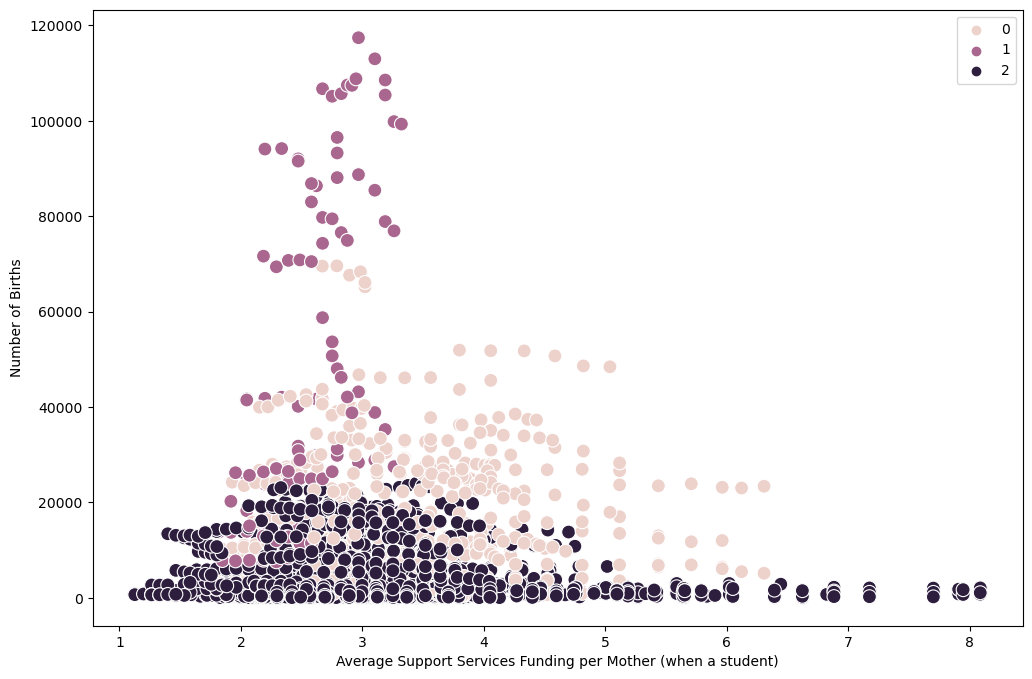

In [24]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_proc['7yr_avg_support_per_student'], y = df_proc['number_of_births'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Support Services Funding per Mother (when a student)')
plt.ylabel('Number of Births')
plt.show()

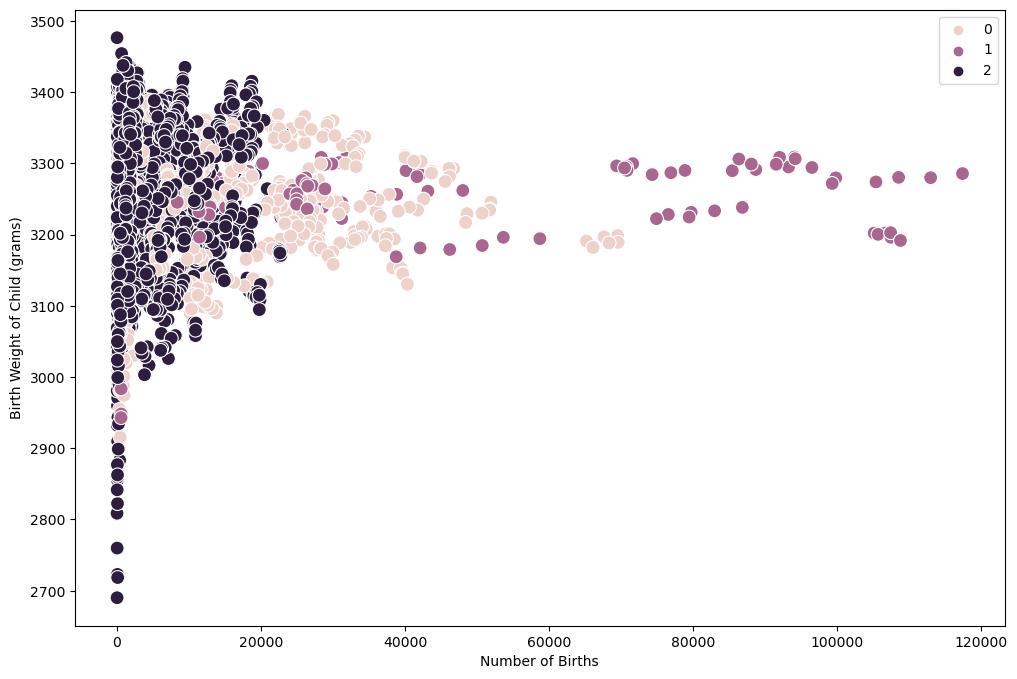

In [17]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_proc['number_of_births'], y = df_proc['avg_birth_weight_grams'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Births')
plt.ylabel('Birth Weight of Child (grams)')
plt.show()

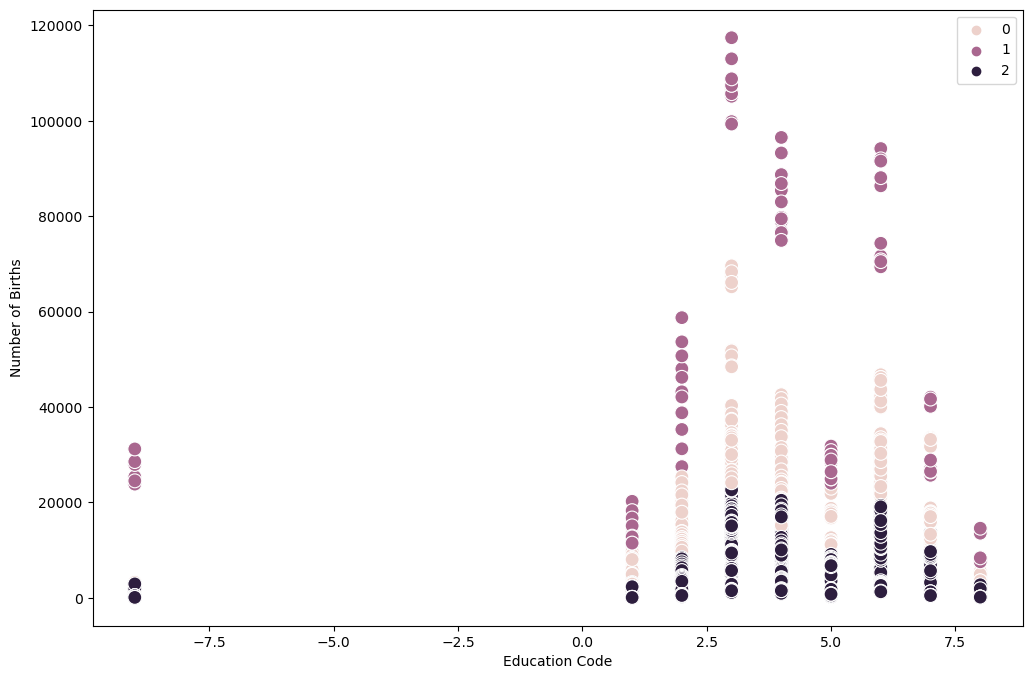

In [18]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_proc['education_code'], y = df_proc['number_of_births'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Education Code')
plt.ylabel('Number of Births')
plt.show()

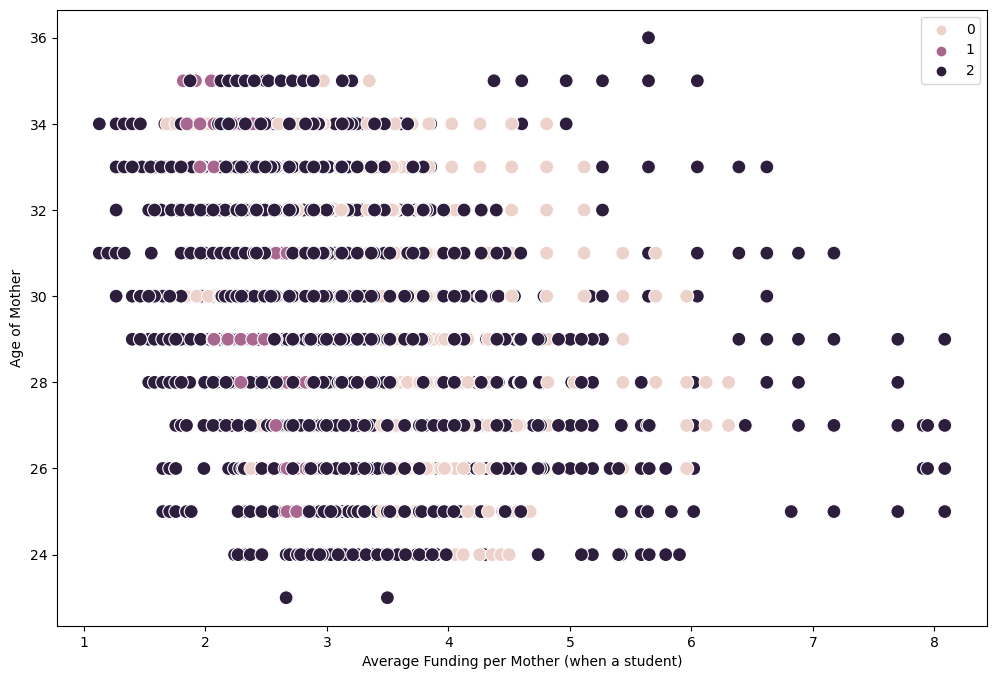

In [19]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_proc['7yr_avg_support_per_student'], y = df_proc['avg_mother_age'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Funding per Mother (when a student)')
plt.ylabel('Age of Mother')
plt.show()

### 7. Discuss Clusters

Age of Mother vs Number of Births

    Cluster 2 is largely around 20000 births or fewer (low end), while Cluster 1 is on the high end of births and Cluster 0 is somewhere in-between.  These clusters are neatly stacked on top of each other relatively simply.


Average Funding per Mother (when a student) vs Number of Births

    Once again, the largest cluster is at 20000 births or fewer and centered around an average funding of 7.5 - 10. The next cluster has definitive shift to the right, centering somewhere around 12.5. Meanwhile, the cluster with the highest number of births is also centered around 10.
    
Interpretation

    The cluster data indicates that there is a factor--perhaps undeterminable from the data--that does seem to tie together these ideas. The dark purple cluster has a vast majority of dots, so we can consider this the most representative of "the average outcome" for our current purposes. Let's break down the data by comparing their performance:
    
    Dark Purple - Low number of births, low school funding spread to high with lower clustering, large variation of age
    
    Purple - High number of births, low school funding with no spread, least variation on age
    
    Pink - Medium number of births, high school funding with minor spread, middling variation on age
    
    Despite previous data exploration telling us there is not much correlation between school funding and number of births nor mother's age, this clustering analysis details a different story -- that there is another factor tying them all together.
    
    My best guess--which is all it is--as to what the connection could be is income level could be the most likely culprit. If so, this *could* imply that low-income = purple cluster, middle-income = dark purple cluster, and high-income = pink cluster. If true, this implies (a) high-income areas would be more likely to receive higher educational funding and have multiple children per mother, starting at a delayed date--possibly due to a delay higher education, (b) middle-income areas would be more likely to receive a wider spread of low and high educational funding and have fewer children starting at younger years, and (c) low-income areas receive low educational funding and have more children than other groups, though they start this the latest.
    
    Even if this interpretation is incorrect, this shows the cluster analyses can make sense under certain conditions.

### 8. Calculate Descriptive Statistics

In [25]:
# Assign Clusters in Dataframe

df_proc.loc[df_proc['clusters'] == 2, 'cluster'] = 'dark purple'
df_proc.loc[df_proc['clusters'] == 1, 'cluster'] = 'purple'
df_proc.loc[df_proc['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
# Check Statistics

df_proc.groupby('cluster').agg({'avg_mother_age':['mean','median'], 'number_of_births':['mean','median'], '7yr_avg_total_per_student':['mean','median']})

avg_mother_age        number_of_births           \
                      mean median             mean   median   
cluster                                                       
dark purple      29.459357   30.0      4399.336484   2398.5   
pink             29.758555   30.0     15833.895437  11741.0   
purple           30.185185   30.0     46119.027778  31213.5   

            7yr_avg_total_per_student             
                                 mean     median  
cluster                                           
dark purple                  9.991382   9.541410  
pink                        11.258759  10.705510  
purple                       9.289911   9.320107

### 9. Proposal of Future Use

These results show that number of births is strongly based on which cluster is being observed, and the average school funding when the mother was in public school correlates with this when viewed as separate entities, separate clusters. The first proposal for use would be to try to find the causal connection (my suspicion, as mentioned above, is income level, so we could start there). Barring this, though, I would suggest tying this data back to another geospatial analysis. Are the clusters more concentrated in some states versus others, and do they match this data even when analyzed separately by state (or even a more granular level)?